In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

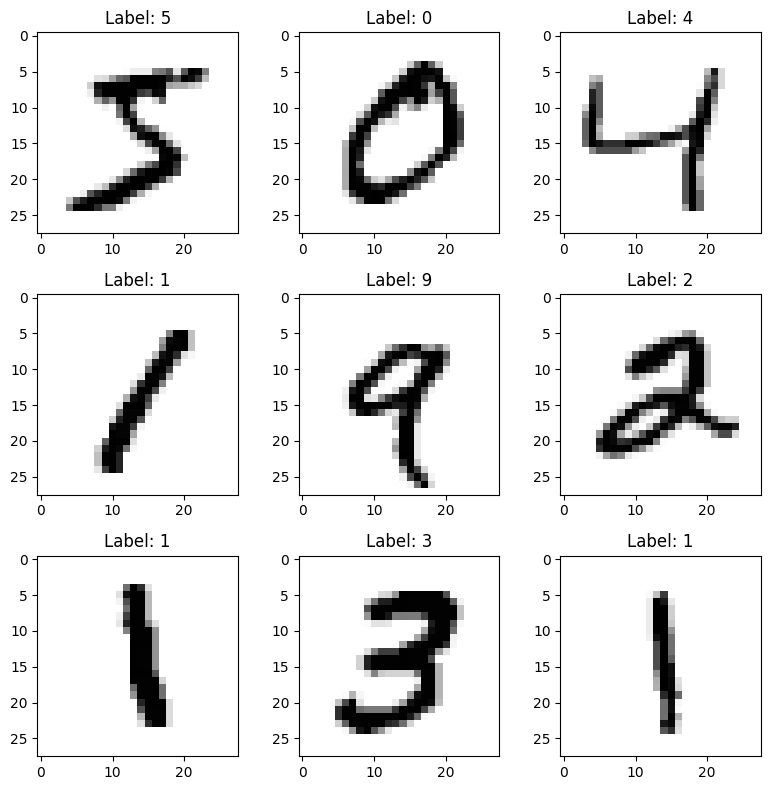

In [3]:
# Plot some examples from the dataset
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='binary')
    ax.set(title=f"Label: {y_train[i]}")
plt.tight_layout()

In [4]:
# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [5]:
# Build a neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2617 - accuracy: 0.9258 - val_loss: 0.1370 - val_accuracy: 0.9567
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1147 - accuracy: 0.9670 - val_loss: 0.1042 - val_accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0790 - accuracy: 0.9768 - val_loss: 0.0823 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0595 - accuracy: 0.9822 - val_loss: 0.0793 - val_accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0833 - val_accuracy: 0.9743
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0765 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0732 - val_accu

In [6]:
# Make predictions on the testing set
y_pred_cat = model.predict(X_test)
y_pred = np.argmax(y_pred_cat, axis=1)

313/313 [==============================] - 1s 3ms/step


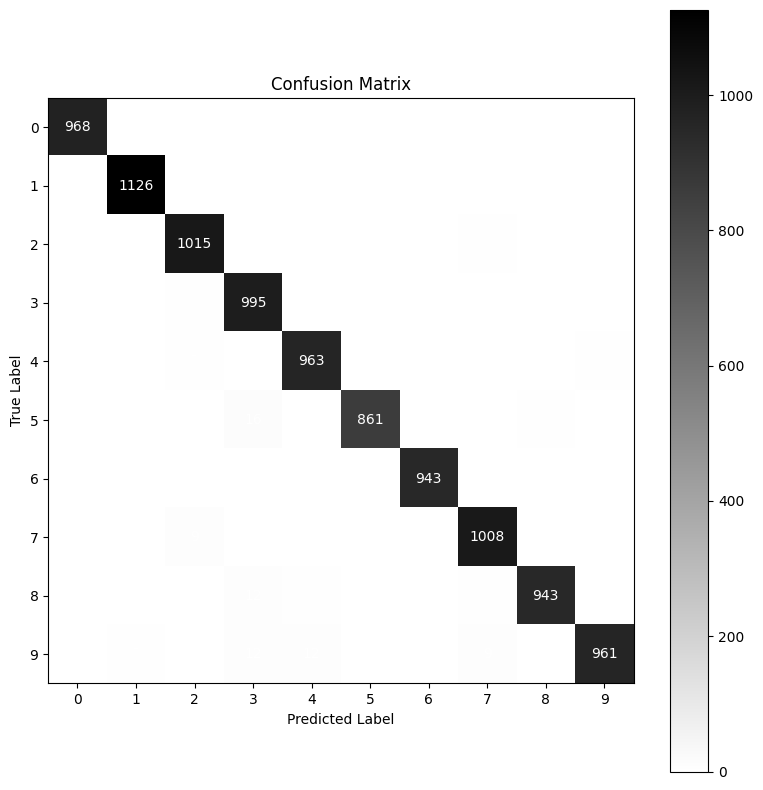

In [7]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap='binary', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
for i in range(10):
    for j in range(10):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.tight_layout()
plt.show()


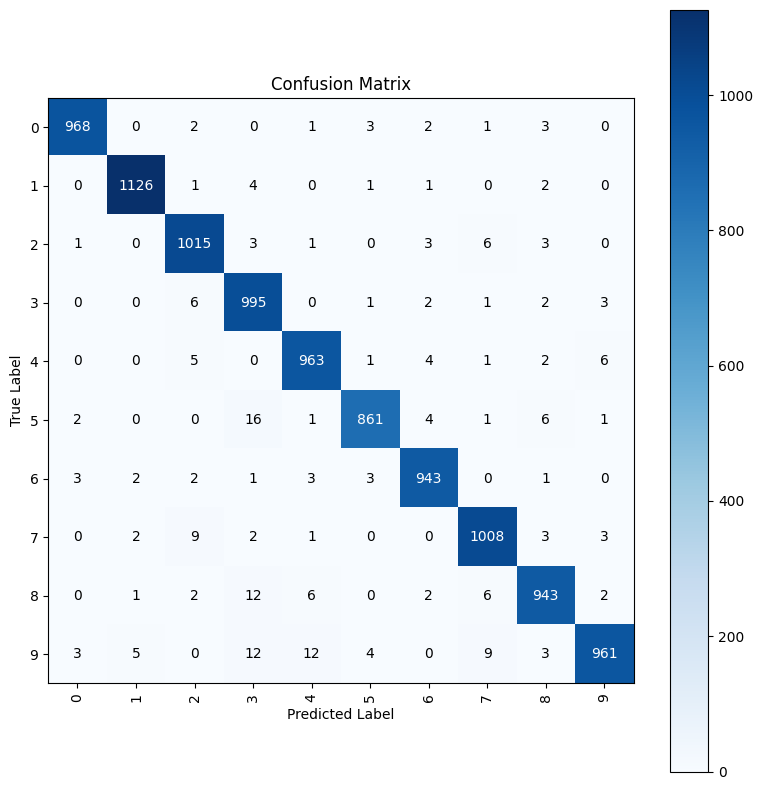

In [8]:
# Plot the colorful confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=np.arange(10),
       yticklabels=np.arange(10),
       xlabel='Predicted Label',
       ylabel='True Label',
       title='Confusion Matrix')
ax.xaxis.set_tick_params(rotation=90)
plt.colorbar(im, ax=ax)
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()